In [29]:
import control as c
import complete_par as par
import numpy as np
import matplotlib.pyplot as plt

In [30]:
C1 = np.matrix([[(par.CYbdot-2*par.mub)*par.b/par.V0, 0, 0, 0],
                [0, -par.b/(2*par.V0), 0, 0],
                [0,0, -2*par.mub*par.KX2*(par.b**2)/(par.V0**2), 2*par.mub*par.KXZ*(par.b**2)/(par.V0**2)],
                [par.Cnbdot*(par.b)/(par.V0), 0, 2*par.mub*par.KXZ*(par.b**2)/(par.V0**2), -2*par.mub*par.KZ2* (par.b**2)/(par.V0**2)]])
C2 =  np.matrix([[par.CYb, par.CL, par.CYp*(par.b)/(2*par.V0), (par.CYr-4*par.mub)*(par.b)/(2*par.V0)],
                  [0, 0, 1, 0],
                  [par.Clb, 0, par.Clp*(par.b)/(2*par.V0), par.Clr*(par.b)/(2*par.V0) ],
                  [par.Cnb, 0, par.Cnp*(par.b)/(2*par.V0), par.Cnr*(par.b)/(2*par.V0) ]])
C3 =  np.matrix([[par.CYda, par.CYdr],
                  [0, 0],
                  [par.Clda, par.Cldr],
                  [par.Cnda, par.Cndr]])

In [31]:
C1_inv = np.linalg.inv(C1)
C2_inv = np.linalg.inv(C2)

A = - np.matmul(C1_inv, C2)
B = - np.matmul(C2_inv, C3)

C = np.matrix([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1]])
D = np.matrix([[0, 0], [0, 0], [0, 0], [0, 0]])


In [32]:
t_sim = 120
dt_sim = 0.05
num_dts = int(t_sim/dt_sim)
t = np.linspace(0,t_sim, num_dts)
sys = c.ss(A,B,C,D)
print(sys)


A = [[-3.00816147e-01  9.81000000e-02 -9.70020572e-04 -9.72893669e-01]
 [-0.00000000e+00 -0.00000000e+00  1.25699202e+01 -0.00000000e+00]
 [-1.28250854e+01 -0.00000000e+00 -7.57119639e+00  2.41637958e+00]
 [ 7.47992406e+00 -0.00000000e+00 -6.47979702e-01 -8.69032844e-01]]

B = [[  4.63450603   1.39863378]
 [384.98823758  60.58934143]
 [ -0.          -0.        ]
 [ 37.37013561   5.77178497]]

C = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

D = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]



[3.84988238e+02 3.85418815e+02 3.86527230e+02 ... 8.28017435e+07
 8.32272233e+07 8.36548894e+07]


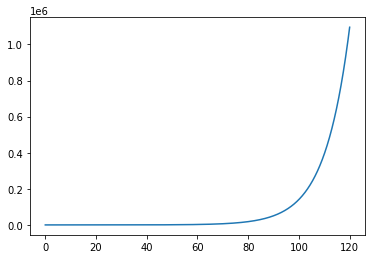

4.634506028879076


In [33]:
sys_response = c.impulse_response(sys, t)
# print('u', sys_response[1][0][-1],'a', sys_response[1][1][-1],'t', sys_response[1][2][-1],'q', sys_response[1][3][-1],)
print(sys_response[1][1])
plt.plot(sys_response[0], sys_response[1][0])
plt.show()
print(sys_response[1][0][0])